In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

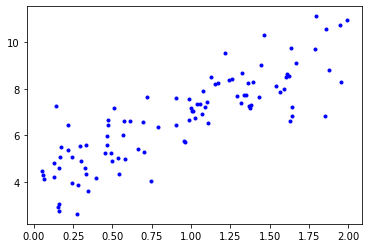

In [8]:
plt.plot(X, y, "b.")

In [9]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.07450528],
       [2.85544238]])

In [10]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.07450528],
       [9.78539005]])

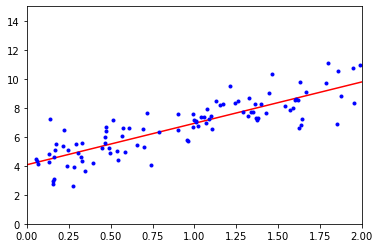

In [11]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [14]:
lr.intercept_, lr.coef_

(array([4.07450528]), array([[2.85544238]]))

In [15]:
lr.predict(X_new)

array([[4.07450528],
       [9.78539005]])

In [16]:
#moore penrose inverse
np.linalg.pinv(X_b).dot(y)

array([[4.07450528],
       [2.85544238]])

### Batch gradient descent

In [23]:
eta = 0.1
m = 100
n_iterations = 1000

theta = np.random.randn(2,1)
print(theta)

for x in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

[[0.54643036]
 [1.20879359]]


In [24]:
theta

array([[4.07450528],
       [2.85544238]])

### Stohastic gradient descent

In [25]:
n_epochs = 50
t0, t1 = 5, 50

In [28]:
theta = np.random.randn(2,1)
theta

array([[0.17468518],
       [1.13200425]])

In [30]:
# not important
np.random.randint(m)

86

In [38]:
# not important
random_index = np.random.randint(m)
random_index, X_b[random_index:random_index+1]

(33, array([[1.        , 1.25930344]]))

In [40]:
def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        # m is 100,  randint picks one value between 1 - 100       
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [41]:
theta

array([[4.0930856 ],
       [2.83534991]])

### Stohastic GD with SK-Learn

In [42]:
from sklearn.linear_model import SGDRegressor

In [45]:
SGD = SGDRegressor(max_iter= 1000, tol= 1e-3, penalty= None, eta0= 0.1)

In [46]:
# ravel flatterns the array to 1D array
SGD.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [47]:
SGD.intercept_, SGD.coef_

(array([4.03093561]), array([2.84303002]))

### Mini-batch gradient descent

In [50]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [51]:
theta

array([[4.02224464],
       [2.80238957]])